In [1]:
import pandas as pd
import numpy as np

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize


In [2]:
## read the file
df=pd.read_excel("Creatives_New.xlsx", Sheetname ='Walmart')

In [3]:
## glimpse in data
df.head()

,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,...,CTA,Product Shot / Product Portfolio,Lifestyle Imagery,Heavy Copy,Savings Messaging,Lable Description_x,Lable Description_y,Object_description,Logo_description,Text_description
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Demographic,160x600,NaN,NaN,2018-01-01,...,Shop Now,Product Portfolio,Yes,No,No,0,0,0,0,0
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Shop Now,Product Portfolio,Yes,No,No,0,0,0,0,0
2,01_ABB_J9273,01_ABB_J9273_AbbottMommy,CT_BABY_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Contextual,160x600,NaN,NaN,2018-01-01,...,Shop Now,Product Portfolio,Yes,No,No,0,0,0,0,0
3,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_BRAND_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Shop Now,Product Portfolio,Yes,No,No,0,0,0,0,0
4,01_ABB_L6179,01_ABB_L6179_PediaSure18,BT_BRAND_01_ABB_L6179_PediaSure18,160x600_NEILSEN_BT_BRAND_01_ABB_L6179_PediaSur...,CICAgKDrlf74LhABGAEoATIIHjncu2pS3YE,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,2018-01-22,...,Shop Now,Product Shot,Yes,No,No,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11780 entries, 0 to 11779
Data columns (total 24 columns):
Converge                            11780 non-null object
Campaign Name                       11780 non-null object
Media Buy Name                      11780 non-null object
Creative Name                       11780 non-null object
Creative Image                      11780 non-null object
Targeting Type                      11780 non-null object
Creative Size                       11780 non-null object
L1 Vertical                         11331 non-null object
L2 Vertical                         11331 non-null object
IO Start Date                       11780 non-null datetime64[ns]
IO End Date                         11780 non-null datetime64[ns]
Impressions                         11780 non-null int64
Clicks                              11780 non-null int64
Color                               11780 non-null object
CTA                                 11780 non-null object
Product

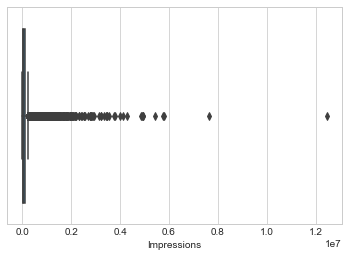

In [5]:
## check for outliers in Impression
import seaborn as sns
sns.boxplot(x=df['Impressions'])

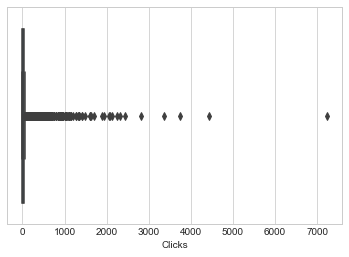

In [6]:
## check for outliers in Impression
sns.boxplot(x=df['Clicks'])


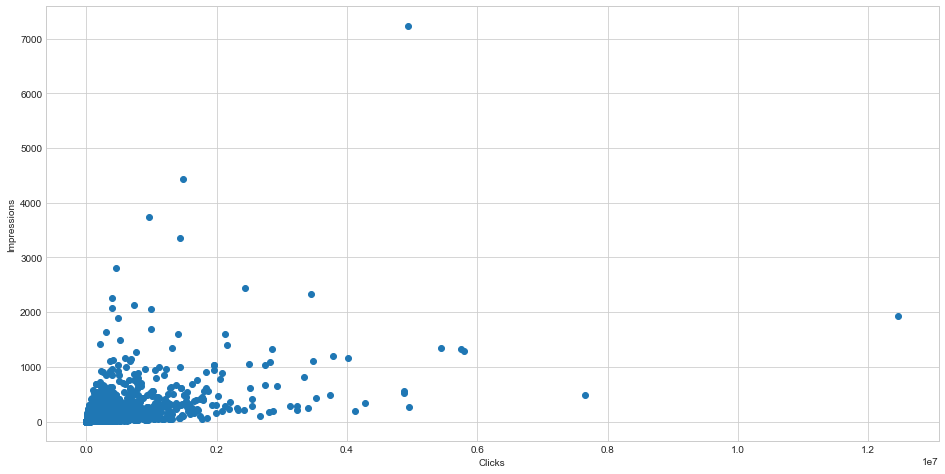

In [7]:
## plotting impression v/s clicks
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Impressions'], df['Clicks'])
ax.set_xlabel('Clicks')
ax.set_ylabel('Impressions')
plt.show()

In [4]:
# Rescale Impressions
df['log_Impressions'] = [np.log(x) for x in df['Impressions']]
df.head()

,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,...,Product Shot / Product Portfolio,Lifestyle Imagery,Heavy Copy,Savings Messaging,Lable Description_x,Lable Description_y,Object_description,Logo_description,Text_description,log_Impressions
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Demographic,160x600,NaN,NaN,2018-01-01,...,Product Portfolio,Yes,No,No,0,0,0,0,0,12.217285
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Product Portfolio,Yes,No,No,0,0,0,0,0,12.080708
2,01_ABB_J9273,01_ABB_J9273_AbbottMommy,CT_BABY_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Contextual,160x600,NaN,NaN,2018-01-01,...,Product Portfolio,Yes,No,No,0,0,0,0,0,11.364356
3,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_BRAND_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Product Portfolio,Yes,No,No,0,0,0,0,0,11.006706
4,01_ABB_L6179,01_ABB_L6179_PediaSure18,BT_BRAND_01_ABB_L6179_PediaSure18,160x600_NEILSEN_BT_BRAND_01_ABB_L6179_PediaSur...,CICAgKDrlf74LhABGAEoATIIHjncu2pS3YE,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,2018-01-22,...,Product Shot,Yes,No,No,0,0,0,0,0,11.962363


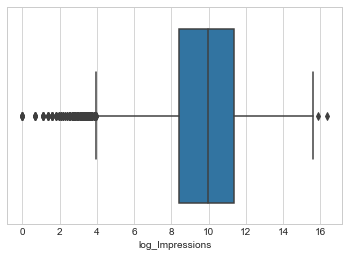

In [5]:
sns.boxplot(x=df['log_Impressions'])


In [6]:
# Rescale Clicks
df['log_Clicks'] = [np.log(x) for x in df['Clicks']]
df.head()

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\envs\python3-TF2.0\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,...,Lifestyle Imagery,Heavy Copy,Savings Messaging,Lable Description_x,Lable Description_y,Object_description,Logo_description,Text_description,log_Impressions,log_Clicks
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Demographic,160x600,NaN,NaN,2018-01-01,...,Yes,No,No,0,0,0,0,0,12.217285,3.526361
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Yes,No,No,0,0,0,0,0,12.080708,3.044522
2,01_ABB_J9273,01_ABB_J9273_AbbottMommy,CT_BABY_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Contextual,160x600,NaN,NaN,2018-01-01,...,Yes,No,No,0,0,0,0,0,11.364356,3.806662
3,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_BRAND_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,NaN,NaN,2018-01-01,...,Yes,No,No,0,0,0,0,0,11.006706,2.197225
4,01_ABB_L6179,01_ABB_L6179_PediaSure18,BT_BRAND_01_ABB_L6179_PediaSure18,160x600_NEILSEN_BT_BRAND_01_ABB_L6179_PediaSur...,CICAgKDrlf74LhABGAEoATIIHjncu2pS3YE,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,2018-01-22,...,Yes,No,No,0,0,0,0,0,11.962363,2.944439


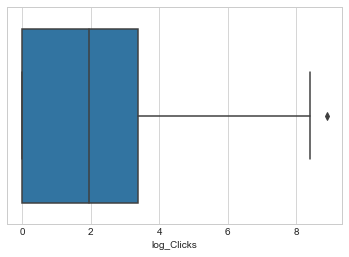

In [7]:
sns.boxplot(x=df['log_Clicks'])

In [9]:
## count for missing values in data
num_missing_data = df.isnull().sum()
num_missing_data

Converge                              0
Campaign Name                         0
Media Buy Name                        0
Creative Name                         0
Creative Image                        0
Targeting Type                        0
Creative Size                         0
L1 Vertical                         449
L2 Vertical                         449
IO Start Date                         0
IO End Date                           0
Impressions                           0
Clicks                                0
Color                                 0
CTA                                   0
Product Shot / Product Portfolio    101
Lifestyle Imagery                     0
Heavy Copy                            0
Savings Messaging                     0
Lable Description_x                   0
Lable Description_y                   0
Object_description                    0
Logo_description                      0
Text_description                      0
log_Impressions                       0


In [10]:
num_missing_data = df['L1 Vertical'].isnull()
df['L1 Vertical'].head()

0                NaN
1                NaN
2                NaN
3                NaN
4    Baby & Toddlers
Name: L1 Vertical, dtype: object

In [11]:
df['L1 Vertical']= df['L1 Vertical'].fillna('Others')
df['L2 Vertical']= df['L2 Vertical'].fillna('Others')

In [114]:
data=df.copy()
data.head()

,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,...,Lifestyle Imagery,Heavy Copy,Savings Messaging,Lable Description_x,Lable Description_y,Object_description,Logo_description,Text_description,log_Impressions,log_Clicks
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Demographic,160x600,Others,Others,2018-01-01,...,Yes,No,No,0,0,0,0,0,12.217285,3.526361
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,Others,Others,2018-01-01,...,Yes,No,No,0,0,0,0,0,12.080708,3.044522
2,01_ABB_J9273,01_ABB_J9273_AbbottMommy,CT_BABY_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Contextual,160x600,Others,Others,2018-01-01,...,Yes,No,No,0,0,0,0,0,11.364356,3.806662
3,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_BRAND_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,CICAgKDrvtzikAEQoAEY2AQoATIIVrA6qgUgqUs,Behavioral,160x600,Others,Others,2018-01-01,...,Yes,No,No,0,0,0,0,0,11.006706,2.197225
4,01_ABB_L6179,01_ABB_L6179_PediaSure18,BT_BRAND_01_ABB_L6179_PediaSure18,160x600_NEILSEN_BT_BRAND_01_ABB_L6179_PediaSur...,CICAgKDrlf74LhABGAEoATIIHjncu2pS3YE,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,2018-01-22,...,Yes,No,No,0,0,0,0,0,11.962363,2.944439


In [115]:
data=data.drop(['Converge', 'Campaign Name', 'Creative Image','Media Buy Name',
                'Creative Name','IO Start Date','IO End Date','Color','CTA',
                'Product Shot / Product Portfolio','Lifestyle Imagery','Heavy Copy',
                'Savings Messaging'], axis=1)
data.head()

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks,Lable Description_x,Lable Description_y,Object_description,Logo_description,Text_description,log_Impressions,log_Clicks
0,Demographic,160x600,Others,Others,202255,34,0,0,0,0,0,12.217285,3.526361
1,Behavioral,160x600,Others,Others,176435,21,0,0,0,0,0,12.080708,3.044522
2,Contextual,160x600,Others,Others,86194,45,0,0,0,0,0,11.364356,3.806662
3,Behavioral,160x600,Others,Others,60277,9,0,0,0,0,0,11.006706,2.197225
4,Behavioral,160x600,Baby & Toddlers,Infant Care & Consumables,156743,19,0,0,0,0,0,11.962363,2.944439


In [116]:
data['Targeting Type'] = pd.factorize(data['Targeting Type'])[0] + 1


In [117]:
data['Creative Size'] = pd.factorize(data['Creative Size'])[0] + 1


In [118]:
data['L1 Vertical'] = pd.factorize(data['L1 Vertical'])[0] + 1


In [119]:
data['L2 Vertical'] = pd.factorize(data['L2 Vertical'])[0] + 1


In [120]:
data['Lable Description_x']=data['Lable Description_x'].replace(to_replace =0, value ="Other") 

In [121]:
data['Lable Description_x'] = pd.factorize(data['Lable Description_x'])[0] + 1


In [122]:
data['Lable Description_y']=data['Lable Description_y'].replace(to_replace =0, value ="Other") 


In [123]:
data['Lable Description_y'] = pd.factorize(data['Lable Description_y'])[0] + 1


In [124]:
data['Object_description']=data['Object_description'].replace(to_replace =0, value ="Other") 


In [125]:
data['Object_description'] = pd.factorize(data['Object_description'])[0] + 1


In [126]:
data['Logo_description']=data['Logo_description'].replace(to_replace =0, value ="Other") 


In [127]:
data['Logo_description'] = pd.factorize(data['Logo_description'])[0] + 1


In [128]:
data=data.drop(['Text_description','log_Clicks'], axis=1)


In [165]:
data.to_csv("C:\\Users\\adishree.b\\Documents\\R_walmart.csv")

In [33]:
#dataframe = pd.DataFrame(data, columns=data['log_Impressions'])
#pd.plotting.scatter_matrix(dataframe, c=data, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [130]:
data_knn = data[['Targeting Type','Creative Size', 'L1 Vertical','L2 Vertical','Lable Description_x','Lable Description_y',
                 'Object_description','Logo_description','Impressions','Clicks']]

In [131]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11780 entries, 0 to 11779
Data columns (total 10 columns):
Targeting Type         11780 non-null int64
Creative Size          11780 non-null int64
L1 Vertical            11780 non-null int64
L2 Vertical            11780 non-null int64
Lable Description_x    11780 non-null int64
Lable Description_y    11780 non-null int64
Object_description     11780 non-null int64
Logo_description       11780 non-null int64
Impressions            11780 non-null int64
Clicks                 11780 non-null int64
dtypes: int64(10)
memory usage: 920.4 KB


In [87]:
#from sklearn import preprocessing
#from sklearn import utils
#
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(data_knn['log_Impressions'])

In [88]:
#print(utils.multiclass.type_of_target(data_knn['log_Impressions']))

In [89]:
#print(utils.multiclass.type_of_target(data_knn['log_Impressions'].astype('int')))

In [90]:
#print(utils.multiclass.type_of_target(encoded))

In [133]:
data_knn.columns

Index(['Targeting Type', 'Creative Size', 'L1 Vertical', 'L2 Vertical',
       'Lable Description_x', 'Lable Description_y', 'Object_description',
       'Logo_description', 'Impressions', 'Clicks'],
      dtype='object')

In [135]:
data_kmeans = data_knn.drop(columns = ['Impressions','Clicks'])

In [167]:
data_kmeans.head(2)

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Lable Description_x,Lable Description_y,Object_description,Logo_description
0,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1


#### k-means clustering without impressions:

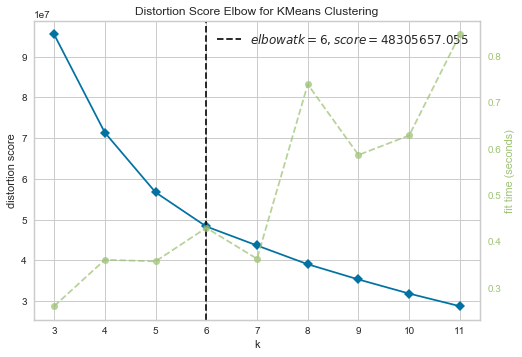

In [137]:

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_kmeans)        # Fit the data to the visualizer
visualizer.show()   

In [138]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=6)
k_means.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [139]:
data_knn['Clusters']=k_means.labels_

In [140]:
data_knn.groupby(['Clusters']).Impressions.mean()

Clusters
0     98302.976892
1     96422.192037
2    145777.065041
3    110951.815594
4    144230.568729
5    113556.591810
Name: Impressions, dtype: float64

In [141]:
data_knn['Clusters'].value_counts()

1    6530
0    1731
5    1514
3     808
2     615
4     582
Name: Clusters, dtype: int64

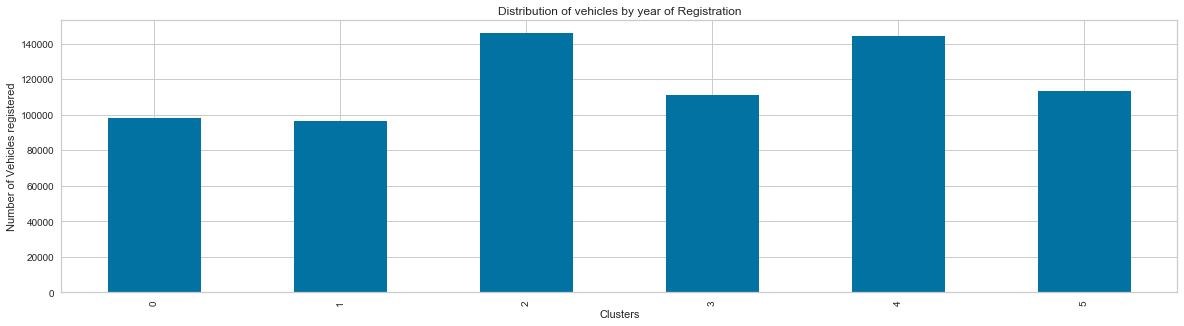

In [142]:
fig = plt.figure(figsize=(20,5))
plt.xlabel('Year of registration')
plt.ylabel('Number of Vehicles registered')
plt.title('Distribution of vehicles by year of Registration')
data_knn.groupby(['Clusters']).Impressions.mean().plot.bar()

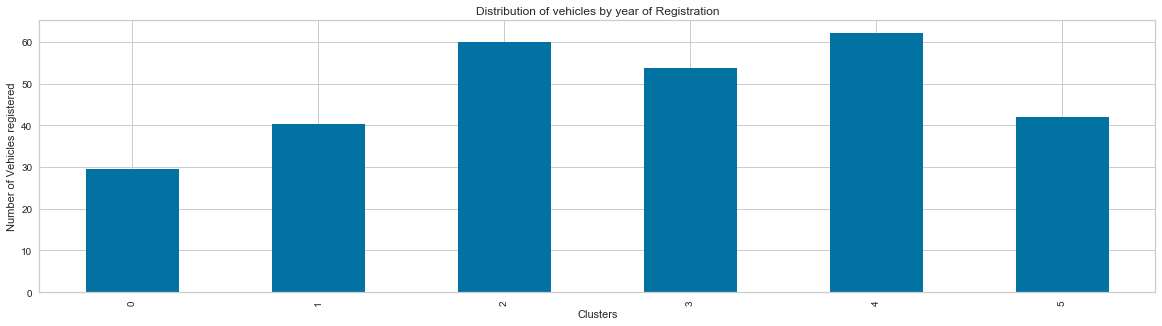

In [143]:
fig = plt.figure(figsize=(20,5))
plt.xlabel('Year of registration')
plt.ylabel('Number of Vehicles registered')
plt.title('Distribution of vehicles by year of Registration')
data_knn.groupby(['Clusters']).Clicks.mean().plot.bar()

In [153]:
Imp_clust = data_knn.groupby(['Clusters']).Impressions.mean().reset_index()
click_clust = data_knn.groupby(['Clusters']).Clicks.mean().reset_index()

In [164]:
data_c = Imp_clust.merge(click_clust,on='Clusters')

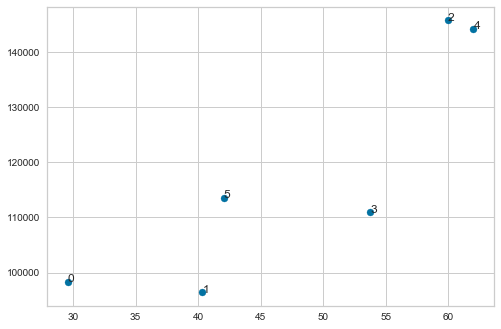

In [163]:
y = data_c['Impressions']
z = data_c['Clicks']
n = data_c['Clusters']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))